# Classificação das taxas de suicídio dos EUA

Neste trabalho estamos utilizando a biblioteca SkLearn da SciKit, usando a ferramenta MLPClassifier (MultiLayer Perceptron).

## Alunos
* Alan Azevedo Bancs
* Bianca Lara Gomes
* Maykon da Silva de Siqueira

In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import numpy as np 

from pprint import pprint

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [2]:
# Realiza a normalização dos dados
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data



In [3]:
# Carrega os dados
df = pd.read_csv('master.csv')

# Exibe o alguns deles
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [4]:
# Mostra as estatisticas do arquivo
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,698.171765,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,247.902248,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.630000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,673.000000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,765.000000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,844.000000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,944.000000,1.812071e+13,126352.000000


In [5]:
# Normaliza os dados para utilização
df = mapping(df, 'sex')
df = mapping(df, 'country')
df = mapping(df, 'age')

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,100,1987,0,5,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,100,1987,0,3,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,100,1987,1,5,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,100,1987,0,0,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,100,1987,0,4,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [6]:
# Separa o cabeçalho dos dados
y = df['suicides/100k pop'] / 10
y=y.astype('int')

# Remove o número de suicídios e outras colunas desnecessárias
x = df.drop([
    'population', 'suicides_no', 'year','country-year', 
    'suicides/100k pop', 'generation', 'HDI for year',
    ' gdp_for_year ($) '
], axis=1)

pprint(x)
pprint(y)

       country  sex  age  gdp_per_capita ($)
0          100    0    5                 796
1          100    0    3                 796
2          100    1    5                 796
3          100    0    0                 796
4          100    0    4                 796
...        ...  ...  ...                 ...
27815        0    1    3                2309
27816        0    1    0                2309
27817        0    0    2                2309
27818        0    1    2                2309
27819        0    1    1                2309

[27820 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
27815    0
27816    0
27817    0
27818    0
27819    0
Name: suicides/100k pop, Length: 27820, dtype: int64


In [7]:
# Normaliza as escalas dos dados
scaler = StandardScaler()
scaler.fit(x)
scaler.transform(x)

array([[ 1.67762677, -1.        ,  1.46274448, -0.8508637 ],
       [ 1.67762677, -1.        ,  0.29227963, -0.8508637 ],
       [ 1.67762677,  1.        ,  1.46274448, -0.8508637 ],
       ...,
       [-1.72697514, -1.        , -0.29295279, -0.7707567 ],
       [-1.72697514,  1.        , -0.29295279, -0.7707567 ],
       [-1.72697514,  1.        , -0.87818522, -0.7707567 ]])

In [8]:
# Utiliza 20% dos dados para teste e 80% para treinamento
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=27)

In [9]:
# Quantidade de classes existentes
classes = y.unique()
print("Quantidade de classes:")
pprint(len(classes))

Quantidade de classes:
21


In [10]:
# Realiza a parametrização da MultiLayer Perceptron
clf = MLPClassifier(
    hidden_layer_sizes=(
        50,
        100,
        100,
        100,
        100,
        100,
        100,
        100,
        100,
        100,
        100,
        21 
    ), 
    max_iter=200, 
    solver='adam', 
    activation='logistic',
    verbose=True
)

# Realiza o treinamento
clf.fit(x_train, y_train)

# Realiza a predição usando os dados de teste
y_pred = clf.predict(x_test)

Iteration 1, loss = 1.69652726
Iteration 2, loss = 1.31233264
Iteration 3, loss = 1.29417315
Iteration 4, loss = 1.28929766
Iteration 5, loss = 1.28712531
Iteration 6, loss = 1.28598940
Iteration 7, loss = 1.28537575
Iteration 8, loss = 1.28488332
Iteration 9, loss = 1.28440578
Iteration 10, loss = 1.28430761
Iteration 11, loss = 1.28428192
Iteration 12, loss = 1.28422259
Iteration 13, loss = 1.28417222
Iteration 14, loss = 1.28425317
Iteration 15, loss = 1.28403007
Iteration 16, loss = 1.28426407
Iteration 17, loss = 1.28401831
Iteration 18, loss = 1.28419185
Iteration 19, loss = 1.28374646
Iteration 20, loss = 1.28418911
Iteration 21, loss = 1.28378700
Iteration 22, loss = 1.28368529
Iteration 23, loss = 1.28425574
Iteration 24, loss = 1.28381701
Iteration 25, loss = 1.28428444
Iteration 26, loss = 1.28388301
Iteration 27, loss = 1.28396671
Iteration 28, loss = 1.28398593
Iteration 29, loss = 1.28405316
Iteration 30, loss = 1.28397537
Training loss did not improve more than tol=0.000

In [11]:
# Exibe os dados preditos
pprint(y_pred)

# Verifica a acurácia
accuracy_score(y_test, y_pred) * 100

array([0, 0, 0, ..., 0, 0, 0])


62.50898634076204

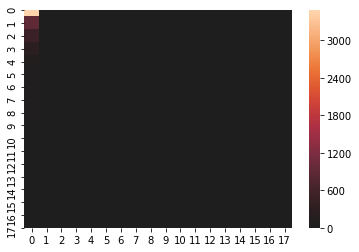

In [12]:
# Exibe a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True)